In [2]:
import cv2

In [3]:
img = cv2.imread("C:/Users/Puneet Jindal 25/ml_course_cb/download.jpeg")
gray = cv2.imread("C:/Users/Puneet Jindal 25/ml_course_cb/download.jpeg", cv2.IMREAD_GRAYSCALE)

In [4]:
cv2.imshow('image', img)
cv2.imshow('grayscale', gray)
cv2.waitKey(10000)
cv2.destroyAllWindows()

In [4]:
"""
Python: cv2.VideoCapture(device) → <VideoCapture object>

filename – name of the opened video file (eg. video.avi) or image sequence 
           (eg. img_%02d.jpg, which will read samples like img_00.jpg, img_01.jpg, img_02.jpg, ...)
device – id of the opened video capturing device (i.e. a camera index). 
         If there is a single camera connected, just pass 0.

VideoCapture::read
Grabs, decodes and returns the next video frame.
This is the most convenient method for reading video files or capturing data from 
decode and return the just grabbed frame.

Python: cv2.VideoCapture.read([image]) → retval, image
 If no frames has been grabbed (camera has been disconnected, 
 or there are no more frames in video file), the methods return false 
 and the functions return NULL pointer.
"""


cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.IMREAD_GRAYSCALE)
    
    if ret==False:
        continue
    
    cv2.imshow('video', frame)
    cv2.imshow('gray', gray)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

"""
VideoCapture::release¶
Closes video file or capturing device.
"""
cap.release()
cv2.destroyAllWindows()

In [5]:
"""
Use the CascadeClassifier class to detect objects in a video stream. 
Particularly, we will use the functions:
    load to load a .xml classifier file. It can be either a Haar or a LBP classifer
    detectMultiScale to perform the detection.

"""

'\nUse the CascadeClassifier class to detect objects in a video stream. \nParticularly, we will use the functions:\n    load to load a .xml classifier file. It can be either a Haar or a LBP classifer\n    detectMultiScale to perform the detection.\n\n'

In [12]:
face_cascade = cv2.CascadeClassifier("C:/Users/Puneet Jindal 25/ml_course_cb/opencv/haarcascade_frontalface_alt.xml")

In [13]:
"""
detectMultiScale(image, scaleFactor, minNeighbors): 
This is a general function to detect objects, in this case, 
it'll detect faces since we called in the face cascade. If it 
finds a face, it returns a list of positions of said face in 
the form “Rect(x,y,w,h).”, if not, then returns “None”.

scaleFactor: This function compensates a false perception in size 
that occurs when one face appears to be bigger than the other simply 
because it is closer to the camera.

minNeighbors: This is a detection algorithm that uses a moving 
window to detect objects, it does so by defining how many objects 
are found near the current one before it can declare the face found.
 
"""
cap2 = cv2.VideoCapture(0)

while True:
    ret, frame = cap2.read()
    gray = cv2.cvtColor(frame, cv2.IMREAD_GRAYSCALE)
    
    if ret==False:
        continue
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
    
    cv2.imshow("face", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break;
        
cap2.release()
cv2.destroyAllWindows()

In [21]:
def real_time_face_detect(face_cascade, scalefactor=1.2):
    cap2 = cv2.VideoCapture(0)
    while True:
        ret, frame = cap2.read()
        gray = cv2.cvtColor(frame, cv2.IMREAD_GRAYSCALE)
        
        if ret==False:
            continue
            
        faces = face_cascade.detectMultiScale(gray, scalefactor, 5)
        for (x,y,w,h) in faces:
            cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
        
        cv2.imshow('face', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
    cap2.release()
    cv2.destroyAllWindows()

In [24]:
face_cascade2 = cv2.CascadeClassifier("C:/Users/Puneet Jindal 25/ml_course_cb/opencv/lbpcascade_frontalface_improved.xml")
#real_time_face_detect(face_cascade2)

In [71]:
def detect_faces(img, face_cascade, scalefactor=1.1):
    img_copy = img.copy()
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    cv2.imshow('imag1', img_gray)
    faces = face_cascade.detectMultiScale(img_gray, scalefactor, 5)
    for (x,y,w,h) in faces:
        cv2.rectangle(img_copy, (x,y), (x+w,y+h), (255,0,0), 2)
    
    cv2.imshow('image2', img_copy)
    cv2.waitKey(5000)
    cv2.destroyAllWindows()
    return img_copy

    # cv2.imshow('image', img_copy)
    # cv2.waitKey(10000)
    # cv2.destroyAllWindows()

In [76]:
face_cascade = cv2.CascadeClassifier("C:/Users/Puneet Jindal 25/ml_course_cb/opencv/haarcascade_frontalface_alt.xml")
img1 = cv2.imread("C:/Users/Puneet Jindal 25/ml_course_cb/opencv/image_2.png")
img_modi = detect_faces(img1, face_cascade)

In [18]:
from matplotlib import pyplot as plt

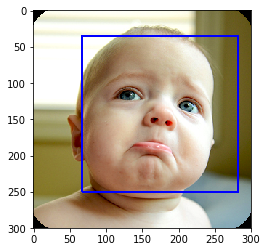

In [77]:
plt.imshow(cv2.cvtColor(img_modi, cv2.COLOR_BGR2RGB))